In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_train.shape

(200000, 202)

In [3]:
data_train.isnull().sum().sum()

0

In [4]:
data_test.isnull().sum().sum()

0

In [5]:
X_train = data_train.drop(columns=['ID_code','target'])
y_train= data_train['target']
print(X_train.shape,y_train.shape)

(200000, 200) (200000,)


In [6]:
X_test = data_test.drop(columns=['ID_code'])
print(X_test.shape)

(200000, 200)


In [7]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [8]:
train_correlations = X_train.corr()
test_correlations = X_test.corr()
train_correlations = train_correlations.values.flatten()
test_correlations = test_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]
test_correlations = test_correlations[test_correlations != 1]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


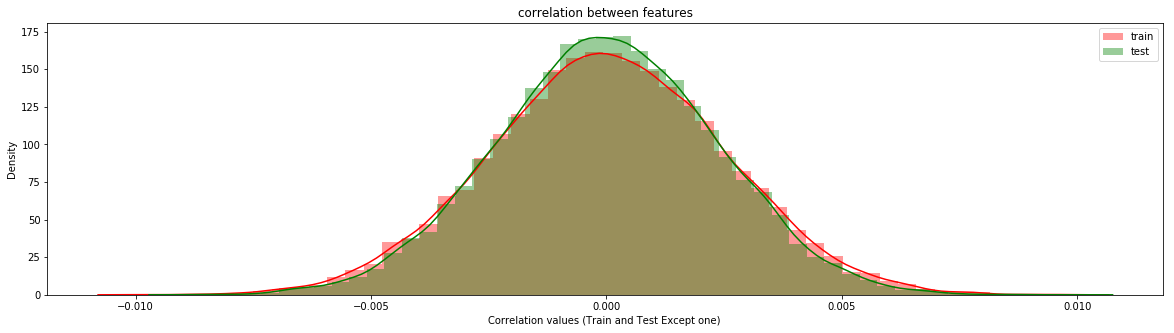

In [9]:
plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Red", label="train")
sns.distplot(test_correlations, color="Green", label="test")
plt.xlabel("Correlation values (Train and Test Except one) ")
plt.ylabel("Density")
plt.title("correlation between features"); 
plt.legend();

In [10]:
features =  X_train.columns.values
print(len(features))

200


In [11]:
pca = PCA(.95)
pca.fit(X_train1, y_train1)
pca.n_components_

111

In [12]:
pca = PCA(.95)
clf = LogisticRegression(solver='lbfgs') 
pipe = Pipeline([('pca', pca), ('logistic', clf)])
pipe.fit(X_train1, y_train1)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [14]:
# testing model
ytest_pred = pipe.predict(X_val)
print("CV score: {:<8.5f}".format(roc_auc_score(ytest_pred, y_val)))

CV score: 0.77839 


In [16]:
sub_lg = pd.DataFrame({"ID_code":data_test["ID_code"].values})
prediction = pipe.predict(X_test)
sub_lg["target"] = prediction
sub_lg.to_csv("Logistic_PCA.csv", index=False)

In [17]:
logisticRegr = LogisticRegression(solver='lbfgs',dual=False,C=3,max_iter=10000)
logisticRegr.fit(X_train1, y_train1)
predictions = logisticRegr.predict(X_val)
print("CV score: {:<8.5f}".format(roc_auc_score(predictions, y_val)))

CV score: 0.79904 


In [20]:
sub_lg = pd.DataFrame({"ID_code":data_test["ID_code"].values})
prediction = logisticRegr.predict(X_test)
sub_lg["target"] = prediction
sub_lg.to_csv("split_Logistic.csv", index=False)

In [21]:
lgcv = LogisticRegressionCV(cv=10,Cs=6,max_iter=10000,scoring='roc_auc')
lgcv.fit(X_train1, y_train1)
predictionscv = lgcv.predict(X_val)

CV score: 0.79904 


In [22]:
print("CV score: {:<8.5f}".format(roc_auc_score(predictionscv, y_val)))

CV score: 0.79906 


In [23]:
sub_lgcv = pd.DataFrame({"ID_code":data_test["ID_code"].values})
prediction = lgcv.predict(X_test)
sub_lgcv["target"] = prediction
sub_lgcv.to_csv("split_Logistic_CV.csv", index=False)